In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sistema inicial

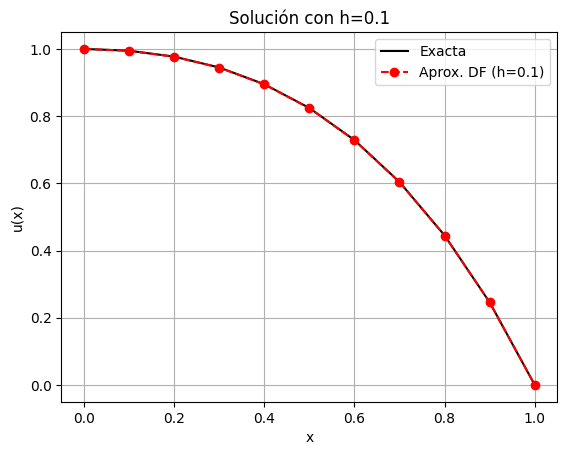

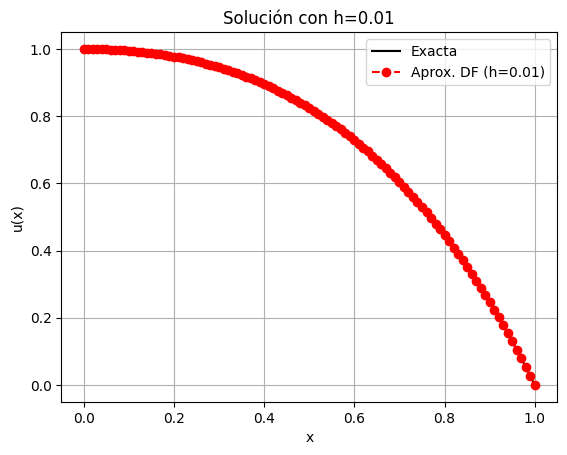

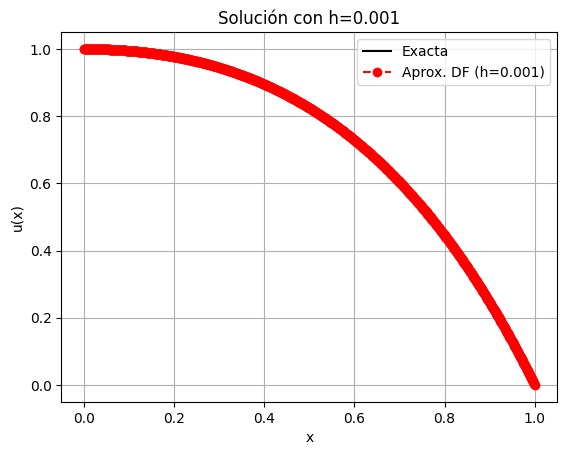

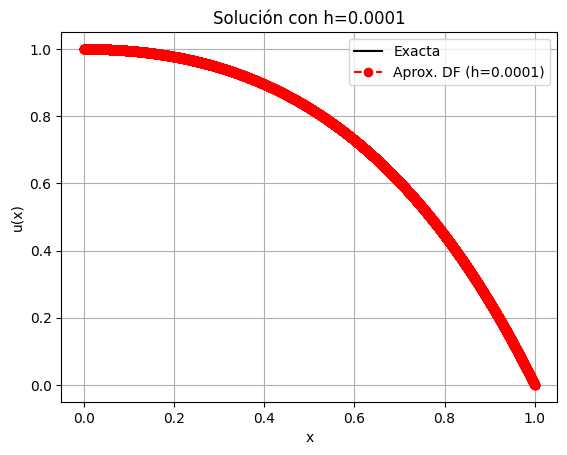

In [6]:
#Solo el sistema inicial, sin resolver a), b) o c)

def finite_diff_solution_7_No(h, a, b):
    N = int((b - a) / h)
    x = np.linspace(a, b, N + 1)

    n_unknowns = N - 1
    A = np.zeros((n_unknowns, n_unknowns))
    f = np.zeros(n_unknowns)

    for i in range(n_unknowns):
        j = i + 1  # Ajuste para indexación
        f[i] = -h**2 * (1 + 2*x[j] - x[j]**2) * np.exp(x[j])

    f[0] -= 1  # Condición de contorno u(0) = 1


    for i in range(n_unknowns):
        A[i, i] = - (2 + h**2 * x[i+1])
        if i > 0:
            A[i, i-1] = 1
        if i < n_unknowns - 1:
            A[i, i+1] = 1


    U_int = np.linalg.solve(A, f)

    u_approx = np.zeros(N+1)
    u_approx[0] = 1
    u_approx[N] = 0
    for i in range(n_unknowns):
        u_approx[i+1] = U_int[i]

    return x, u_approx

def exact_solution(x):
    return (1 - x) * np.exp(x)

h_list = [0.1, 0.01, 0.001, 0.0001]
a, b = 0, 1

for h in h_list:
    x, u_approx = finite_diff_solution_7_No(h, a, b)
    u_exact = exact_solution(x)

    plt.figure()
    plt.plot(x, u_exact, 'k-', label='Exacta')
    plt.plot(x, u_approx, 'ro--', label=f'Aprox. DF (h={h})')
    plt.title(f'Solución con h={h}')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend()
    plt.grid(True)
    plt.show()
